## data visualization
- tools
    - `seaborn` - generating plots
    - `pandas` - wrangling data
    - `matplotlib` -fine-tuning plots
- plotting
    - quantitative data
    - categorical data
- customizing visualizations


### a good data visualization can help you:
- identify anomalies in your data
- better understand your own data
- communicate your findings

## quick introduction: basic visualizations
- histograms
- densityplots
- scatterplot
- barplot
    - grouped barplot
    - stacked barplot
- boxplot
- line plot

### variable types: plots
- statistical/distrubution of quantitative variable
    - single variable
        - histogram
        - densityplot
    - single variable x categorical variable
        - boxplot
- count data
    - count data x categorical variable
        - barplot
    - count data x 2 categorical variables
        - grouped bar plot
        - stacked bar plot
- directly view quantitative variables
    - one variable x time
        - line plot
    - one variable x time x categorical variable
        - multiple lines on the same plot
    - two (or maybe 3) quantitative variables
        - scatter plot



![](images/histogram.png)

![](images/densityplot.png)

![](images/scatterplot.png)

![](images/barplot.png)

![](images/grouped_barplot.png)

![](images/stacked_barplot.png)

Source: [Storytelling with Data (Nussbaumer Knaflic)](http://www.storytellingwithdata.com/books)

![](images/boxplot.png)

![](images/line_plot.png) 

Source: [Storytelling with Data (Nussbaumer Knaflic)](http://www.storytellingwithdata.com/books)

# plotting in python: getting started
first we'll import the libraries we'll use for plotting

In [8]:
# inport working with data libraries
import pandas as pd
import numpy as np

# import seaborn
import seaborn as sns

# import mathplotlib
import matplotlib.pyplot as plt # typical way of import mpl
import matplotlib as mpl # this line is used less frequently

# improve resolution
# comment this line if erroring your machine/screen
%config InlineBackend.figure_format = 'retina'

In [2]:
sns.__version__

'0.11.2'

# `seaborn`
seaborn is a great place to get started when generating plots that don't look awful

## class data
with the libraries we need imported, the first dataset we'll use today is data from the cogs 108 survey from the spring of 2019

In [3]:
df = pd.read_csv('data/df_for_viz.csv')

In [4]:
df.shape

(843, 11)

In [5]:
df.head()

gender                                 lecture_attendance  job  statistics  \
0  female                         I prefer to attend lecture   No           5   
1    male                         I prefer to attend lecture   No           8   
2  female                         I prefer to attend lecture   No           6   
3    male                         I prefer to attend lecture   No           2   
4    male  I prefer not to attend lecture (i.e. catch up ...  Yes           3   

   programming  Java  MATLAB  R  Python  C  SQL  
0            8     1       0  0       0  0    0  
1            4     0       1  0       1  0    0  
2            7     1       0  0       0  0    0  
3           10     1       0  0       0  1    0  
4           10     1       0  0       0  0    0

wrangling that's been done:
- removed lots of identifying information
- standardized gender and job
- separated out programming responses

In [6]:
df.describe()

statistics  programming        Java      MATLAB           R  \
count  843.000000   843.000000  843.000000  843.000000  843.000000   
mean     5.575326     6.769870    0.809015    0.265718    0.153025   
std      1.985687     2.367976    0.393310    0.441977    0.360225   
min      1.000000     1.000000    0.000000    0.000000    0.000000   
25%      4.000000     5.000000    1.000000    0.000000    0.000000   
50%      6.000000     7.000000    1.000000    0.000000    0.000000   
75%      7.000000     9.000000    1.000000    1.000000    0.000000   
max     10.000000    10.000000    1.000000    1.000000    1.000000   

           Python           C         SQL  
count  843.000000  843.000000  843.000000  
mean     0.485172    0.198102    0.003559  
std      0.500077    0.398806    0.059584  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      1.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000

## quantitative variables
- histograms
- densityplots
- scatterplots

### histograms and densityplots
**histograms** and **densityplots** are helpful for visualizing information about a *single quantitative variable*

we can use seaborn's `histplot` function. (`distplot` in olrder versions of `seaborn`)

In [9]:
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17,7) # default plot size to output

In [ ]:
sns.set_theme(context='notebook',style='white',font_scale=2,rc={'axes.spines.right': False,'axes.spines.top': False} )

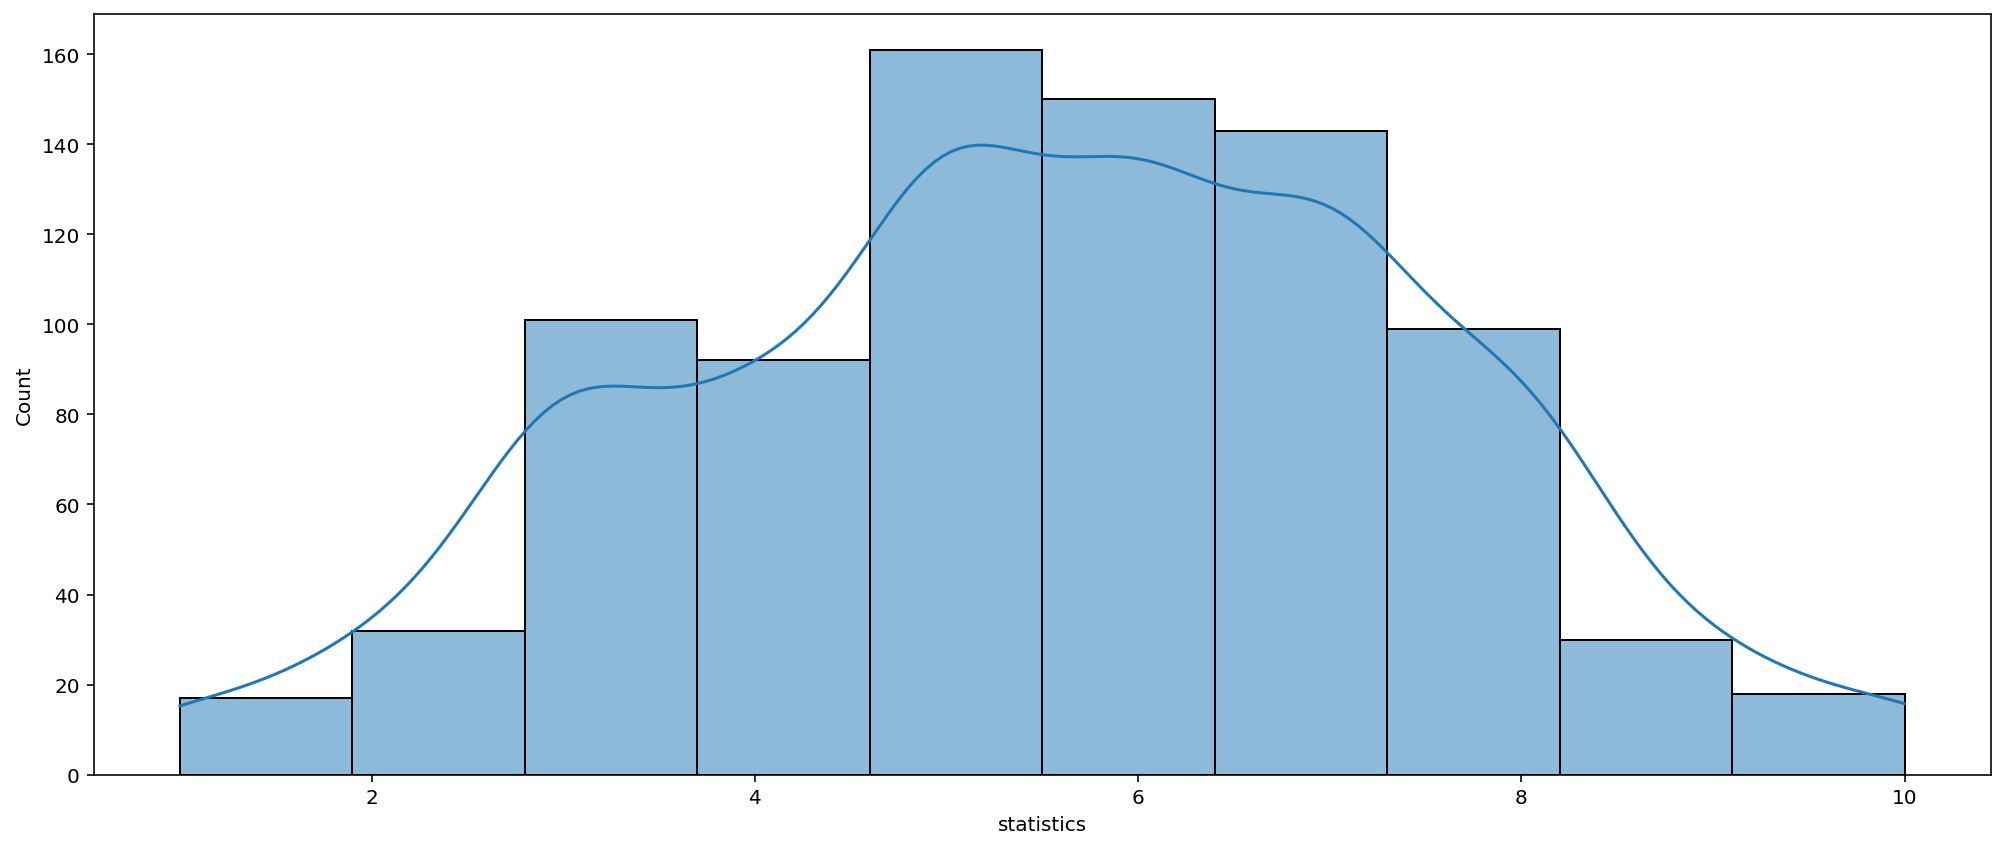

In [10]:
# histogram
# `distplot` in older versions of `seaborn`
sns.histplot(df['statistics'], bins=10, kde=True);

One thing to note about histograms is the fact that the number of bins displayed plays a large role what the viewer takes away from the visualization

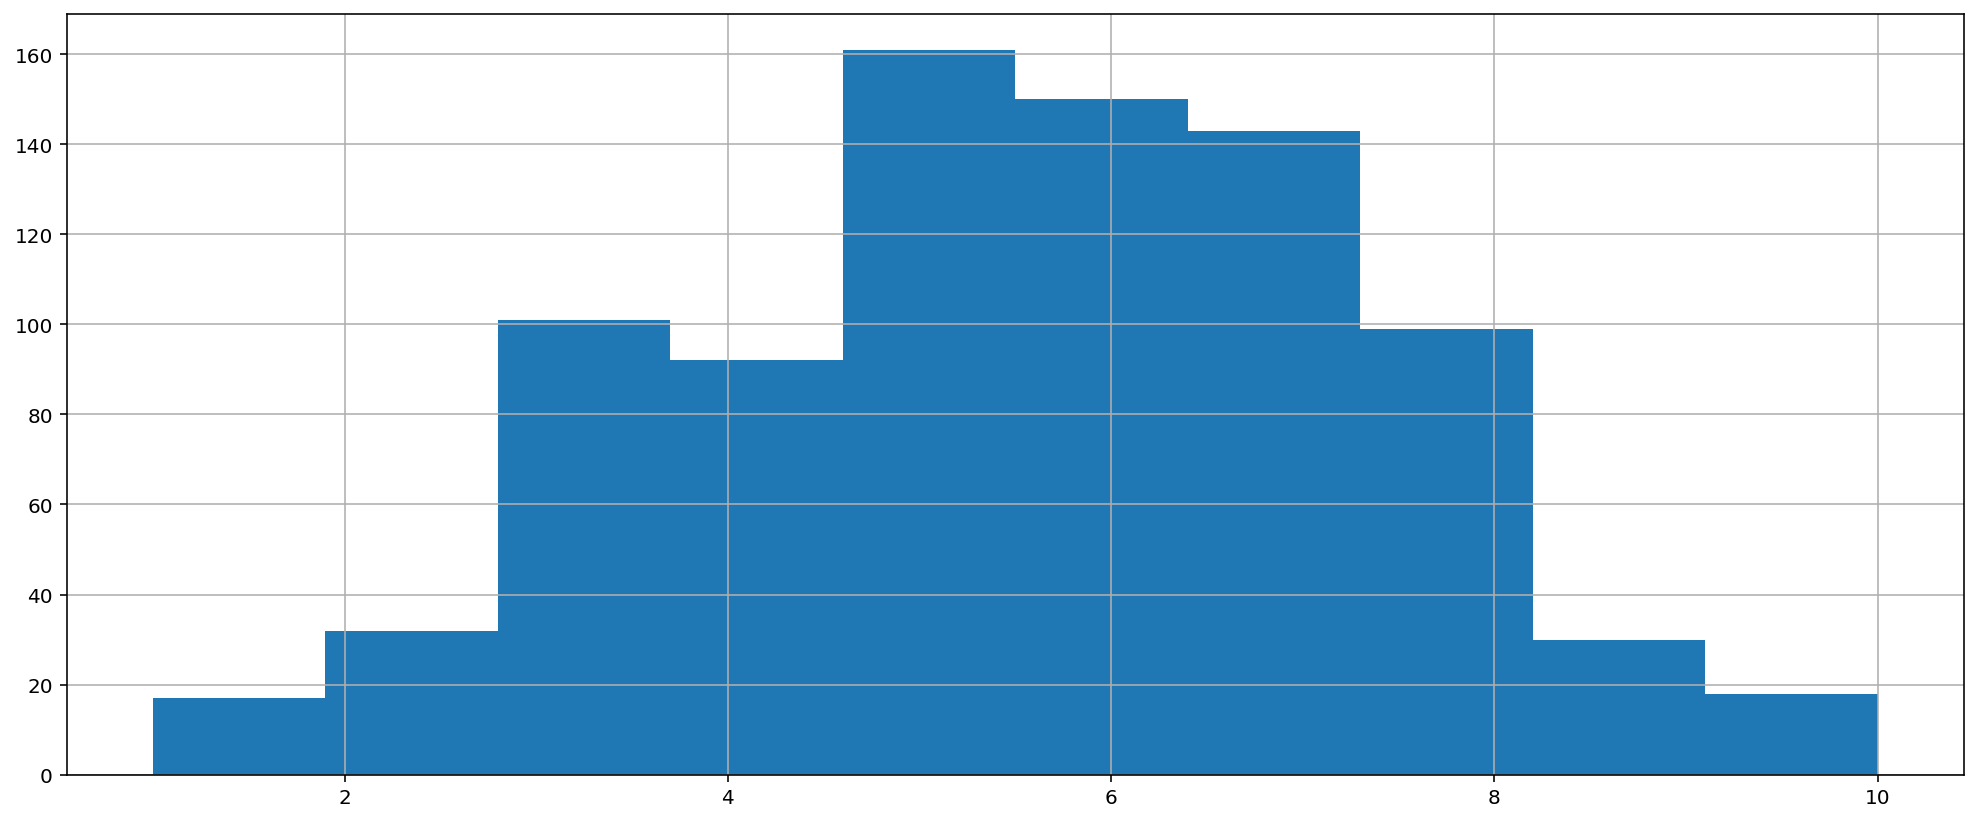

In [11]:
# `distplot` in older versions of `seaborn`
# just histogram - set kde = False
# sns.histplot(df['statistics'], bins=10);

# alternative approach using pandas
df['statistics'].hist(bins=10);

this doesn't follow "visualization best practices"

# visualization best practices
- choose the right type of visualization
- be mindful when choosing colors
- label your axes
- make text big enough
- keep it simple
- less is more:
    - aim to improve your data:ink ratio
    - everything on the page should serve a purpose. if it doesn't, remove it

### best practices: example

![](images/original.png)

Source: [Storytelling with Data (Nussbaumer Knaflic)](http://www.storytellingwithdata.com/books)

#### ideas:
- pros:
    - consistent colors from left to right
    - values provided for each slice
    - overall picture size
- cons:
    - text size
    - legend not ideal
    - colors are not intuitive
    - pie chart not ideal b/c # of categories

suggestions:
- different visulization - stacked barplot

![](images/improvement1.png)
â€‹
Source: [Storytelling with Data (Nussbaumer Knaflic)](http://www.storytellingwithdata.com/books)

![](images/improvement2.png)

Source: [Storytelling with Data (Nussbaumer Knaflic)](http://www.storytellingwithdata.com/books)

![](images/improvement3.png)

Source: [Storytelling with Data (Nussbaumer Knaflic)](http://www.storytellingwithdata.com/books)

### less is more
the *less is more* approach suggests that we should probably get rid of this background color now and remove the gridlines. we'll use the *less is more* approach as we work through the other types if visualizations

let's improve that now for our original plot...

In [12]:
# `distplot` in older versions of `seaborn`
# change color to dark grey
ax = sns.histplot(df['statistics'], kde=False, 
                  bins=10, color='#686868')

# remove the top and right lines
sns.despine()
# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students are moderately comfortable with statistics')
ax.set_ylabel('Count')
ax.set_xlabel('How comfortable are you with statistics?');

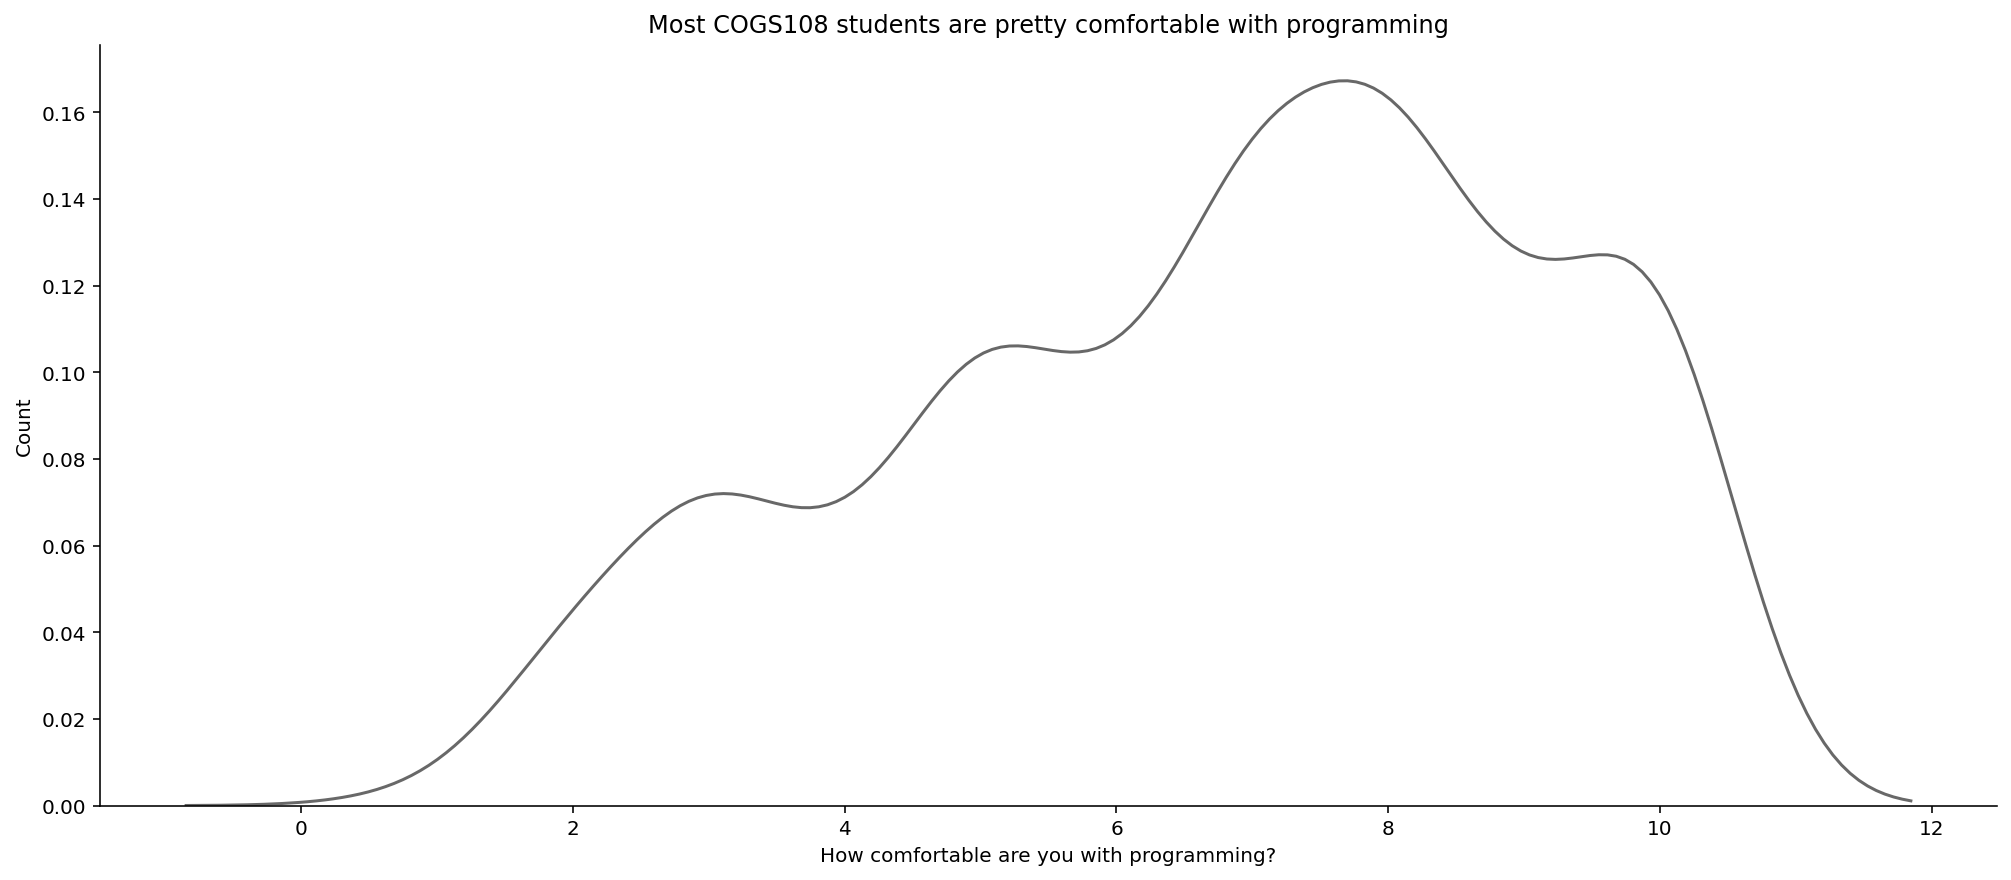

In [13]:
# kdeplot to only display the densityplot
ax = sns.kdeplot(df['programming'], color='#686868')

# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students are pretty comfortable with programming')
ax.set_ylabel('Count')
ax.set_xlabel('How comfortable are you with programming?');

## scatterplots (by a categorical variable)
when you want to plot two numeric variables but want to get some insight about a *third* categorical variable, you can color the points on the plot by the categorical variable